# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [1]:
import pandas as pd

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [30]:
df = pd.read_csv("data/grades.csv")

In [9]:
df.head(3)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [10]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [12]:
df.數學

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

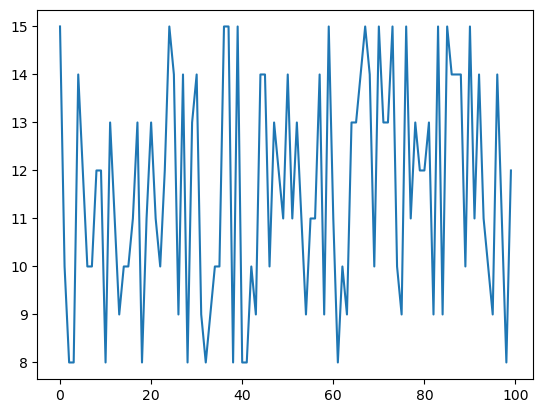

In [14]:
df.數學.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

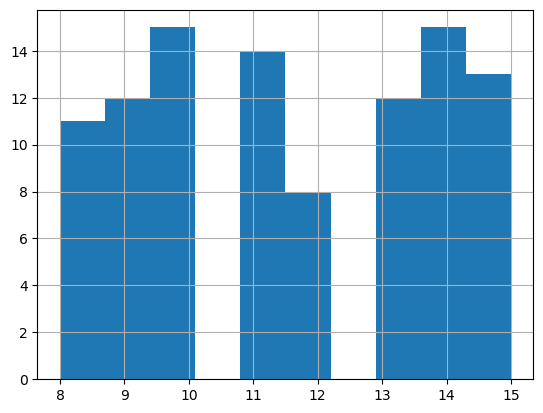

In [21]:
df.數學.hist()

## 3 一些基本的資料分析

算平均。

In [22]:
df.數學.mean()

11.57

算標準差。

不如就該算的都幫我們算算...

In [13]:
df.數學.std()

2.1968526614594834

In [23]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [28]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


只算兩科間的相關係數當然也可以。

In [16]:
df.數學.corr(df.國文)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [110]:
df["總積分"] = df.sum(axis = 1)
df.head()

C:\Users\Ling\AppData\Local\Temp\ipykernel_1520\2130012682.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總積分"] = df.sum(axis = 1)


,姓名,國文,英文,數學,自然,社會,總積分,加權
1,劉俊安,9,10,15,10,13,1013,182
2,胡玉華,10,10,10,8,9,851,154
3,黃淑婷,13,15,8,11,14,1081,194
4,陳上紫,10,10,8,9,14,887,158
5,崔靜成,13,12,14,12,13,1144,206


### 【技巧】

有計算的當然也可以的。

In [33]:
df["加權"] = df.國文*4+df.數學*4+df.英文*4+df.自然*2+df.社會*2

In [34]:
df.head()

,姓名,國文,英文,數學,自然,社會,總積分,加權
0,劉俊安,9,10,15,10,13,57,182
1,胡玉華,10,10,10,8,9,47,154
2,黃淑婷,13,15,8,11,14,61,194
3,陳上紫,10,10,8,9,14,51,158
4,崔靜成,13,12,14,12,13,64,206


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [44]:
df = df.sort_values(by = "加權").head(10)

,姓名,國文,英文,數學,自然,社會,總積分,加權
18,梁慧君,9,8,8,8,12,45,140
7,林金鳳,8,9,10,10,8,45,144
38,吳文伯,8,8,8,15,12,51,150
32,林建亨,9,11,8,8,11,47,150
21,黃奕霞,9,8,11,13,8,49,154
1,胡玉華,10,10,10,8,9,47,154
84,胡凱琳,10,8,9,9,15,51,156
93,李曼夢,11,9,11,8,8,47,156
3,陳上紫,10,10,8,9,14,51,158
8,許協旺,9,9,12,10,10,50,160


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [74]:
df2 = df.sort_values(by = ["加權", "總積分"]).head()

### 【重點】重設 index

In [72]:

df.index = range(1, 101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總積分,加權
19,梁慧君,9,8,8,8,12,45,140
8,林金鳳,8,9,10,10,8,45,144
33,林建亨,9,11,8,8,11,47,150
39,吳文伯,8,8,8,15,12,51,150
2,胡玉華,10,10,10,8,9,47,154


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [70]:
df2[df2.自然 == 15]

,姓名,國文,英文,數學,自然,社會,總積分,加權
39,吳文伯,8,8,8,15,12,51,150


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [93]:
df2[(df2.數學 == 15)and(df2.英文 == 15)]
# No value within these parameters?

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [97]:
df2 = df2.drop("總積分", axis = 1, inplace = True)
df2

### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [89]:
df.drop("總積分", axis = 1)

,姓名,國文,英文,數學,自然,社會,加權
1,劉俊安,9,10,15,10,13,182
2,胡玉華,10,10,10,8,9,154
3,黃淑婷,13,15,8,11,14,194
4,陳上紫,10,10,8,9,14,158
5,崔靜成,13,12,14,12,13,206
...,...,...,...,...,...,...,...
96,蔡佳燕,9,10,9,13,14,166
97,吳筱婷,8,10,14,10,15,178
98,陳家銘,14,9,11,8,12,176
99,李明威,15,9,8,9,15,176


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [100]:
df.drop(1).head()

,姓名,國文,英文,數學,自然,社會,總積分,加權
2,胡玉華,10,10,10,8,9,650,154
3,黃淑婷,13,15,8,11,14,826,194
4,陳上紫,10,10,8,9,14,678,158
5,崔靜成,13,12,14,12,13,874,206
6,張雅岳,13,12,12,12,8,792,188


In [108]:
df.drop(5).head()

,姓名,國文,英文,數學,自然,社會,總積分,加權
1,劉俊安,9,10,15,10,13,774,182
2,胡玉華,10,10,10,8,9,650,154
3,黃淑婷,13,15,8,11,14,826,194
4,陳上紫,10,10,8,9,14,678,158
6,張雅岳,13,12,12,12,8,792,188


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [111]:
df2[df2.姓名 == "崔靜成"]

AttributeError: 'NoneType' object has no attribute '姓名'

In [107]:
df2.drop(df2[df2.姓名 == "崔靜成"].index)

AttributeError: 'NoneType' object has no attribute 'drop'

## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [ ]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [117]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [120]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [121]:
df = df[-300:]

#### 20 日的移動平均

<Axes: xlabel='Date'>

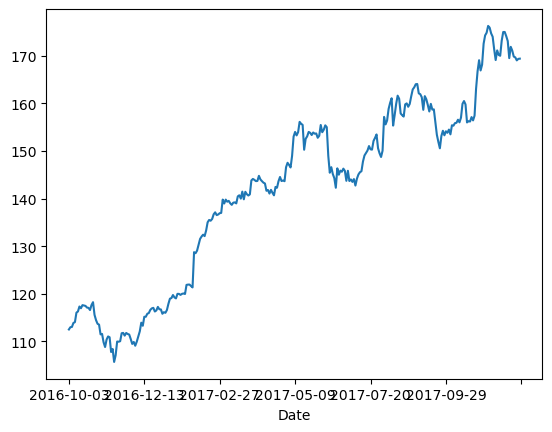

In [122]:
df.Close.plot()

<Axes: xlabel='Date'>

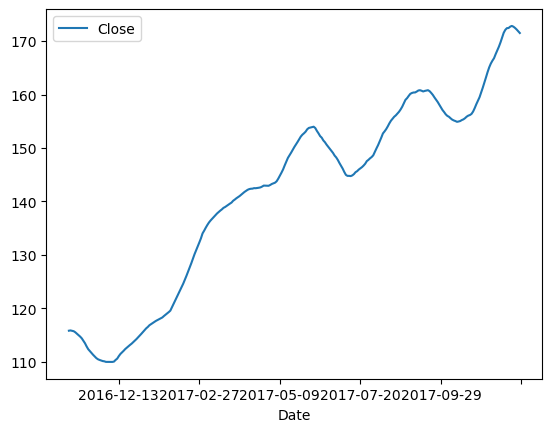

In [127]:
df.Close.rolling(20).mean().plot(label = "Close", legend = True)

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

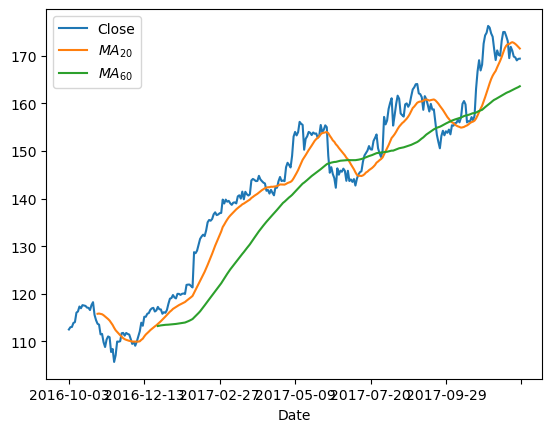

In [123]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [128]:

close = df.Close.values
len(close)

300

In [132]:
import matplotlib.pyplot as plt
x = close[:-1]

In [130]:
y = close[1:]

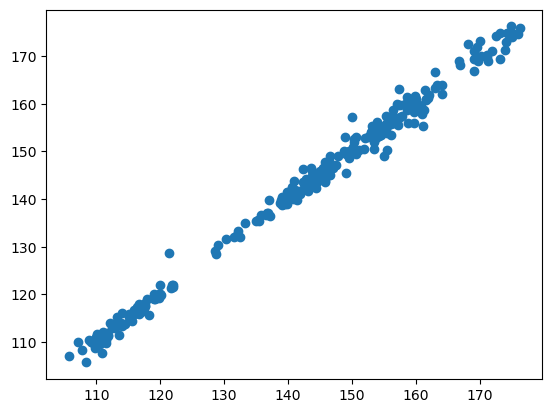

In [133]:
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [135]:
import numpy as np
mydata = np.random.randn(4,3)

In [136]:
mydata

array([[-0.96652325,  0.60239406,  0.67156887],
       [ 1.1761543 , -1.15867846,  0.28624001],
       [-1.1018538 ,  0.75102699,  0.80342482],
       [-2.03016979,  0.32820671, -0.44165332]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [138]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [139]:
df2

,A,B,C
0,-0.966523,0.602394,0.671569
1,1.176154,-1.158678,0.286240
2,-1.101854,0.751027,0.803425
3,-2.030170,0.328207,-0.441653


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [142]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [143]:
df3

,A,B,C
0,-3.596109,0.475169,-0.240431
1,0.806744,0.656536,2.394924
2,1.474796,-0.966721,-1.658127


In [145]:
df4 = pd.concat([df2, df3], axis = 0)

In [146]:
df4

,A,B,C
0,0.077639,-0.945821,-0.172059
1,-0.144027,-0.643987,-0.256541
2,0.000127,0.502087,-0.803233
3,2.462536,-1.299868,0.621845
4,-1.468297,2.362428,-1.210176
5,0.153704,-1.314464,-0.168763
6,-0.728650,1.472328,-0.691872


前面我們弄得亂七八糟的 index 重設一下。

In [148]:
df4.index = range(7)

In [93]:
df4

,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140
4,-0.171660,1.542380,2.685066
5,0.786684,-1.182996,0.401870
6,-2.216455,0.299553,-1.112735


#### 横向的貼

In [150]:
df5 = pd.concat([df2, df3], axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [151]:
df5

,A,B,C,A,B,C
0,-0.966523,0.602394,0.671569,-3.596109,0.475169,-0.240431
1,1.176154,-1.158678,0.286240,0.806744,0.656536,2.394924
2,-1.101854,0.751027,0.803425,1.474796,-0.966721,-1.658127
3,-2.030170,0.328207,-0.441653,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [163]:
df_names = pd.read_csv('data/names.csv', names = ["姓名"])

In [156]:
df_names.head()

,name
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [159]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [164]:
df6 = pd.concat([df_names, df_grades], axis = 1)

In [165]:
df6.head()

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,6,8,14,12
1,王紹尹,8,9,11,6,12
2,黃季坤,7,6,10,9,13
3,許正書,10,15,14,6,7
4,張鈞蓮,14,8,7,15,9


In [167]:
df6.to_csv('data/df6.csv')

In [166]:
df6.head(100)

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,6,8,14,12
1,王紹尹,8,9,11,6,12
2,黃季坤,7,6,10,9,13
3,許正書,10,15,14,6,7
4,張鈞蓮,14,8,7,15,9
...,...,...,...,...,...,...
95,陳君生,15,8,10,15,6
96,曾桂甫,12,10,14,11,14
97,林欣怡,15,14,9,11,7
98,林佳霖,11,9,10,7,7


In [168]:
df6.head()

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,6,8,14,12
1,王紹尹,8,9,11,6,12
2,黃季坤,7,6,10,9,13
3,許正書,10,15,14,6,7
4,張鈞蓮,14,8,7,15,9
